In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 绘图库

In [2]:
#data_path = '../data/data_preprocess_123.csv'
data_path = '../data/data_num_325_correct.csv'
data_path_4 = '../data/data_num_325_4.csv'
data_path_45 = '../data/data_num_325_45.csv'
data_325 = pd.read_csv(data_path)
del data_325['样本编号']
del data_325['时间']
# del data_325['Unnamed: 0']

In [3]:
data_325.head()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Product_RON,Product_RON_loss,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,89.22,1.38,...,2.045436,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,89.32,1.18,...,2.025974,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,89.32,1.38,...,1.964696,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,89.02,1.38,...,2.039041,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,88.32,1.28,...,1.986900,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


In [4]:
label = data_325['Product_RON_loss']
del data_325['Product_RON_loss']
# data_325['Product_RON_loss'] = a

In [5]:
columns = data_325.columns.values.tolist()

In [6]:
data_325_correct = data_325.copy() # copy复制

In [7]:
#箱线图
#输出正常区间
def NumericOutlier(value):
    #value是单维的历史数据
    iqr = np.quantile(value,0.75) - np.quantile(value,0.25)
    quan_down = np.quantile(value,0.25)-3*iqr
    quan_up = np.quantile(value,0.75)+3*iqr
    return [float(quan_down),float(quan_up)]

#输出异常值
def function_ar_NumericOutlier(value, quan_down, quan_up):
    return value > quan_down - 1e-5 and value < quan_up + 1e-5

# value = [0, 1, 2, 3, 1000000]
k = 0
flag = 0
for i in range(0, len(columns) - 1):
    value = data_325[columns[i]].copy()
    Mean = np.mean(value)
    quan_down, quan_up = NumericOutlier(value)
    for j in range(0, len(value)):
        if function_ar_NumericOutlier(value[j], quan_down, quan_up) == False:
            data_325_correct[columns[i]][j] = None

In [8]:
c = list(data_325_correct.isnull().any())
a = []
for i in range(0, len(c)):
    if(c[i]):
        a.append(i)

In [9]:
col = [] #具有异常值的列
for i in range(0, len(a)):
    col.append(columns[a[i]])

In [10]:
len(col)

134

In [11]:
#异常值用中位数填充（异常值为离群点，且在筛选的目标列中）
columns_fill = ['Raw_RON', 'Raw_Bromine_value', 'S-ZORB.TC_2101.PV', 'S-ZORB.TC_5005.PV', 'S-ZORB.FC_5202.PV', 'S-ZORB.AT_5201.PV', 'S-ZORB.PT_9301.PV', 'S-ZORB.FT_9101.PV', 'S-ZORB.FT_9101.PV', 'S-ZORB.PT_9001.PV', 'S-ZORB.FT_9403.PV', 'S-ZORB.TE_9301.PV', 'S-ZORB.FT_9201.PV', 'S-ZORB.FT_9202.PV', 'S-ZORB.FT_3301.PV', 'S-ZORB.FT_9401.PV', 'S-ZORB.PT_9401.PV', 'S-ZORB.FC_2501.PV', 'S-ZORB.FT_1003.PV', 'S-ZORB.FC_1005.PV', 'S-ZORB.FC_1101.PV', 'S-ZORB.AT_1001.PV', 'S-ZORB.SIS_TE_6010.PV',  'S-ZORB.AC_6001.PV', 'S-ZORB.LC_1201.PV', 'S-ZORB.FC_1201.PV',  'S-ZORB.LC_1202.PV', 'S-ZORB.FC_3103.PV', 'S-ZORB.FC_2601.PV', 'S-ZORB.PC_2601.PV', 'S-ZORB.PDT_2604.PV', 'S-ZORB.PDT_2604.PV', 'S-ZORB.TC_2607.PV', 'S-ZORB.AI_2903.PV', 'S-ZORB.PT_1501.PV', 'S-ZORB.FT_1501.TOTAL', 'S-ZORB.FT_5201.PV', 'S-ZORB.FT_1204.PV', 'S-ZORB.FT_5102.TOTAL', 'S-ZORB.TE_1104.DACA', 'S-ZORB.TE_1107.DACA', 'S-ZORB.TE_1103.DACA', 'S-ZORB.LT_9001.DACA', 'S-ZORB.LC_5002.DACA', 'S-ZORB.LC_5102.DACA', 'S-ZORB.LT_3101.DACA', 'S-ZORB.TE_1502.DACA', 'S-ZORB.LC_1203.DACA', 'S-ZORB.PT_2905.DACA', 'S-ZORB.PT_2501.DACA', 'S-ZORB.PT_2501.DACA', 'S-ZORB.LT_1002.DACA', 'S-ZORB.FT_2431.DACA', 'S-ZORB.SIS_PT_2602.PV', 'S-ZORB.SIS_TE_2606.PV', 'S-ZORB.SIS_TE_2605.PV', 'S-ZORB.AT_1001.DACA', 'S-ZORB.PT_6009.DACA', 'S-ZORB.TE_6002.DACA', 'S-ZORB.FT_3501.DACA', 'S-ZORB.PC_3001.DACA', 'S-ZORB.PT_6006.DACA', 'S-ZORB.SIS_TE_6009.PV', 'S-ZORB.SIS_PT_6007.PV', 'S-ZORB.TE_6008.DACA', 'S-ZORB.LT_9101.DACA', 'S-ZORB.PT_6003.DACA', 'S-ZORB.PT_2603.DACA', 'S-ZORB.TE_2603.DACA', 'S-ZORB.TE_2604.DACA', 'S-ZORB.PDT_2409.DACA', 'S-ZORB.FT_1301.DACA' , 'S-ZORB.PT_7510B.DACA', 'S-ZORB.TE_7508B.DACA', 'S-ZORB.PT_7508B.DACA', 'S-ZORB.PT_7505B.DACA', 'S-ZORB.TE_7504B.DACA', 'S-ZORB.PT_7503B.DACA', 'S-ZORB.FC_2432.PIDA.SP', 'S-ZORB.TE_1504.DACA', 'S-ZORB.FT_1204.DACA.PV', 'S-ZORB.LC_1203.PIDA.PV', 'S-ZORB.CAL.LINE.PV', 'S-ZORB.RXL_0001.AUXCALCA.PV', 'S-ZORB.CAL_1.CANGLIANG.PV', 'S-ZORB.FT_5204.DACA.PV', 'S-ZORB.FT_1503.DACA.PV', 'S-ZORB.FT_1504.DACA.PV']
for i in range(0, len(columns_fill)):
    value = data_325[columns_fill[i]].copy()
    for j in range(0, len(data_325[columns_fill[i]])):
        if np.isnan(data_325_correct[columns_fill[i]][j]):
            data_325[columns_fill[i]][j] = np.quantile(value,0.50)

In [12]:
len(columns_fill)

88

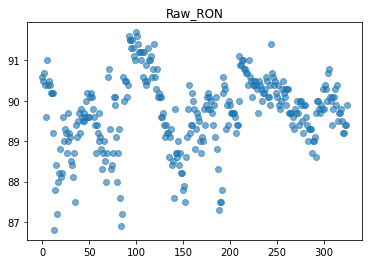

In [13]:
for i in range(0,1):
    x = np.arange(len(data_325[columns_fill[i]]))
    y = data_325[columns_fill[i]]
    title = columns_fill[i]
    plt.title(title)
    plt.scatter(x, y, alpha=0.6)  # 绘制散点图
    plt.show()

In [14]:
data_325.to_csv(data_path_4, index = None) #将这一步的结果保存下来

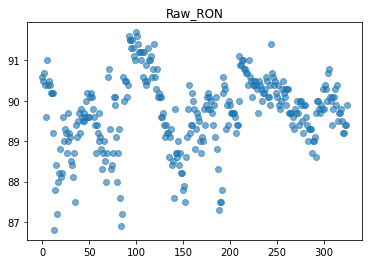

In [15]:
for i in range(0,1):
    x = np.arange(len(data_325[col[i]]))
    y = data_325[col[i]]
    title = col[i]
    plt.title(title)
    plt.scatter(x, y, alpha=0.6)  # 绘制散点图
    plt.show()

In [16]:
data_325_box = pd.read_csv(data_path_4)

In [17]:
# del data_325_box['Unnamed: 0']

In [18]:
columns_box = data_325_box.columns.values.tolist()

In [19]:
data_325_box

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Product_RON,Spent_C,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.000000,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,89.22,2.32,...,2.045436,6368.74700,233.310805,83086802.00,832503.795,2216.40935,39063124.50,1840.14470,39608757.0,0.353271
1,169.000000,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,89.32,2.37,...,2.025974,6360.64530,242.369205,82318954.00,803462.665,2370.58740,38810581.50,1641.73260,39389299.0,0.354504
2,177.000000,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,89.32,2.43,...,1.964696,6504.96490,233.076925,82012004.00,791925.055,2326.46535,38693812.00,1600.67575,39312616.5,0.350181
3,159.000000,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,89.02,3.08,...,2.039041,6506.82495,238.349935,81231373.50,762863.810,2495.22360,38410862.50,1563.71215,39120204.5,0.353930
4,173.000000,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,88.32,2.45,...,1.986900,6560.24225,236.576220,80915707.50,751362.300,2807.78910,38283000.00,1554.35740,39045953.5,0.358053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,9.45,...,2.247015,8328.97475,150.441617,84087479.25,2136687.475,2177.55770,1569503.75,2538.53845,1003276.5,-118.251152
321,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,87.95,9.09,...,2.752566,8457.86080,148.748365,83687113.25,2129270.425,2177.55770,1521263.75,2538.53845,879436.8,-118.764337
322,271.428571,89.4,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,5.72,...,2.935758,8246.20925,150.095445,83087625.75,2118469.700,2177.55770,1448903.75,2538.53845,693676.8,-119.534108
323,266.000000,89.4,46.720000,33.780000,19.500000,45.450000,730.000000,3.6,88.12,4.33,...,2.247015,7998.80235,149.533987,82696129.75,2110959.450,2177.55770,1400663.75,2538.53845,569836.8,-120.047287


In [20]:
#3 sigma
def ThreeSigmod(value: list) -> list:
    #value是单维的历史数据
    avg = np.mean(value)
    std = np.std(value)
    threshold_up = avg + 3*std
    threshold_down = avg -3*std
    return [float(threshold_down),float(threshold_up)]

#输出异常值
def function_ar_ThreeSigmod(value: float, threshould_down: float, threshold_up: float):
    return value > threshold_down - 1e-5 and value < threshold_up + 1e-5

for i in range(0, len(columns_box)):
    value = data_325_box[columns_box[i]].copy()
    threshold_down, threshold_up = ThreeSigmod(value)

    for j in range(0, len(data_325_box[columns_box[i]])):
        if function_ar_ThreeSigmod(value[j], threshold_down, threshold_up) == False:
            data_325_box[columns[i]][j] = np.quantile(value,0.50)


In [21]:
data_325_box['Product_RON_loss'] = label
data_325_box.to_csv(data_path_45, index = None)

In [22]:
data_325_3_sigma = pd.read_csv(data_path_45)

In [23]:
data_325_3_sigma

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Product_RON,Spent_C,...,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV,Product_RON_loss
0,188.000000,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,89.22,2.32,...,6368.74700,233.310805,83086802.00,832503.795,2216.40935,39063124.50,1840.14470,39608757.0,0.353271,1.38
1,169.000000,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,89.32,2.37,...,6360.64530,242.369205,82318954.00,803462.665,2370.58740,38810581.50,1641.73260,39389299.0,0.354504,1.18
2,177.000000,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,89.32,2.43,...,6504.96490,233.076925,82012004.00,791925.055,2326.46535,38693812.00,1600.67575,39312616.5,0.350181,1.38
3,159.000000,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,89.02,3.08,...,6506.82495,238.349935,81231373.50,762863.810,2495.22360,38410862.50,1563.71215,39120204.5,0.353930,1.38
4,173.000000,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,88.32,2.45,...,6560.24225,236.576220,80915707.50,751362.300,2807.78910,38283000.00,1554.35740,39045953.5,0.358053,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,2.39,...,8328.97475,150.441617,84087479.25,2136687.475,2177.55770,1569503.75,2538.53845,1003276.5,-118.251152,1.15
321,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,87.95,9.09,...,8457.86080,148.748365,83687113.25,2129270.425,2177.55770,1521263.75,2538.53845,879436.8,-118.764337,1.25
322,271.428571,89.4,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,5.72,...,8246.20925,150.095445,83087625.75,2118469.700,2177.55770,1448903.75,2538.53845,693676.8,-119.534107,1.35
323,266.000000,89.4,46.720000,33.780000,19.500000,45.450000,730.000000,3.6,88.12,4.33,...,7998.80235,149.533987,82696129.75,2110959.450,2177.55770,1400663.75,2538.53845,569836.8,-120.047287,1.28


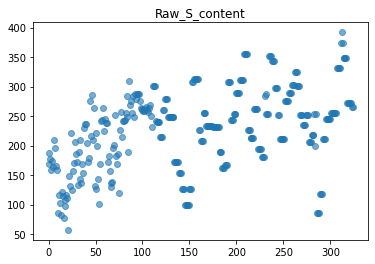

In [24]:
for i in range(0,1):
    x = np.arange(len(data_325[columns_box[i]]))
    y = data_325[columns_box[i]]
    title = columns_box[i]
    plt.title(title)
    plt.scatter(x, y, alpha=0.6)  # 绘制散点图
    plt.show()

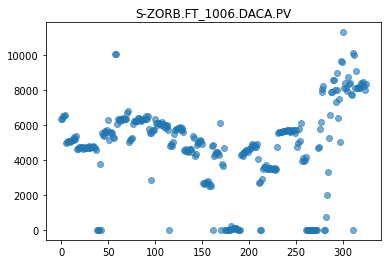

In [25]:
x = np.arange(len(data_325['S-ZORB.FT_1006.DACA.PV'])) #S-ZORB.FT_1006.DACA.PV
y = data_325['S-ZORB.FT_1006.DACA.PV']
title = 'S-ZORB.FT_1006.DACA.PV'
plt.title(title)
plt.scatter(x, y, alpha=0.6)  # 绘制散点图
plt.show()

In [26]:
# x = np.arange(len(data_325['Product_RON_loss']))
# y = data_325['Product_RON_loss']
# title = 'Product_RON_loss'
# plt.title(title)
# plt.scatter(x, y, alpha=0.6)  # 绘制散点图
# plt.show()

In [27]:
# data_325['Product_RON_loss'] = label
# data_325.to_csv(data_path_45)

In [28]:
# data_325